In [75]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns

import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os

In [5]:
# Load data 
os.listdir("data/chest_xray")

['val', 'train', 'test', '__MACOSX']

In [24]:
train = "data/chest_xray/train"
test = "data/chest_xray/test"
val = "data/chest_xray/val"

# Some facts about the dataset 

print("========TRAIN SET=========")
print("Pneumonia: {} cases".format(len(os.listdir(os.path.join(train, "PNEUMONIA")))))
print("Normal: {} cases".format(len(os.listdir(os.path.join(train, "NORMAL")))))

print("========TEST SET==========")
print("Pneumonia: {} cases".format(len(os.listdir(os.path.join(test, "PNEUMONIA")))))
print("Normal: {} cases".format(len(os.listdir(os.path.join(test, "NORMAL")))))

print("======VALIDATION SET======")
print("Pneumonia: {} cases".format(len(os.listdir(os.path.join(val, "PNEUMONIA")))))
print("Normal: {} cases".format(len(os.listdir(os.path.join(val, "NORMAL")))))

========TRAIN SET=========
Pneumonia: 3875 cases
Normal: 1341 cases
========TEST SET==========
Pneumonia: 390 cases
Normal: 234 cases
======VALIDATION SET======
Pneumonia: 8 cases
Normal: 8 cases


In [96]:
lst = [3875,]

'data/chest_xray/train'

In [49]:
# Location of pneumonia x-rays
train_pneumo_lst = os.listdir("data/chest_xray/train/PNEUMONIA")
train_pneumo_dir= os.path.join(train, "PNEUMONIA")

# Get 9 random images from the image list created above
random_xray = [np.random.choice(train_pneumo_lst) for i in range(9)]

                  =========== Display Random Pneumonia X-rays from Train Set ==========


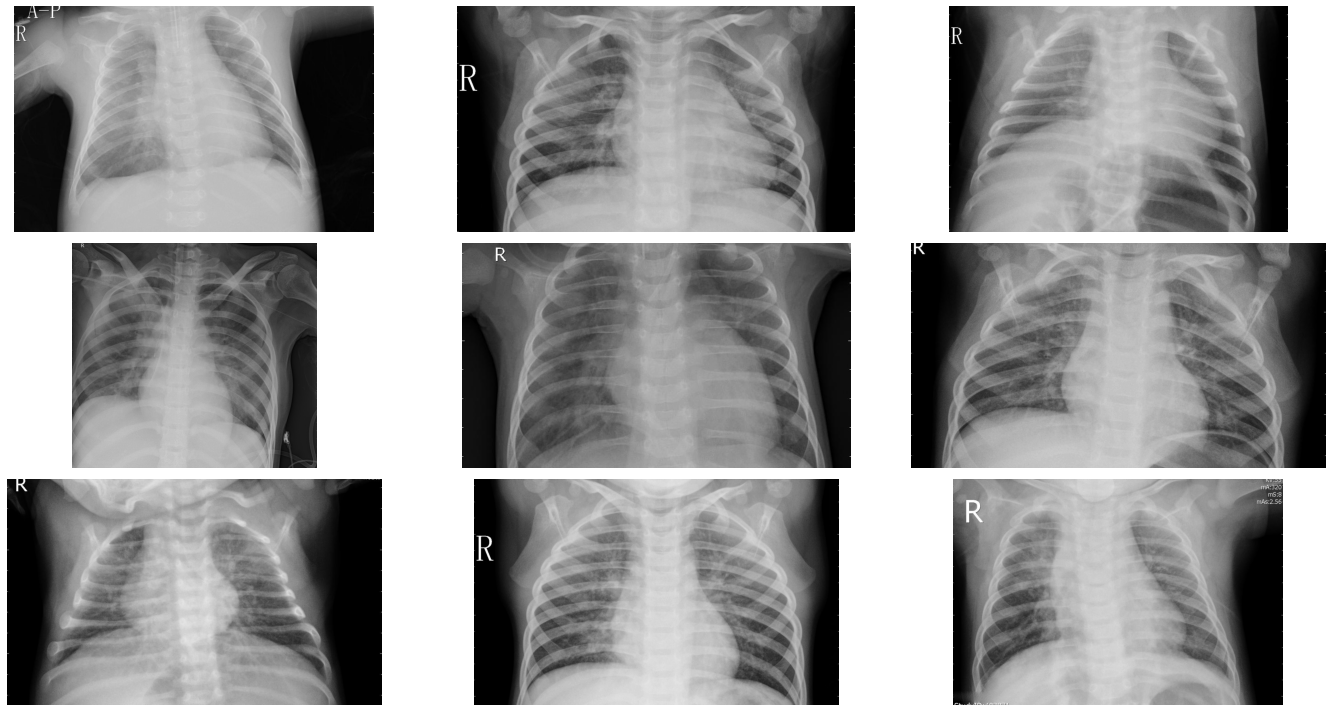

In [53]:
# Plot these random images 
print("                  =========== Display Random Pneumonia X-rays from Train Set ==========")

plt.figure(figsize = (20,10))
for i in range(9):
    plt.subplot(3,3,i+1) 
    xray = plt.imread(os.path.join(train_pneumo_dir,random_xray[i]))
    plt.imshow(xray, cmap ="gray")
    plt.axis("off")
plt.tight_layout()

The dimensions of the image are 840 pixels width and 1480 pixels height, one single color channel.
The maximum pixel value is 255 and the minimum is 0
The mean value of the pixels is 114.8 and the standard deviation is 61.4


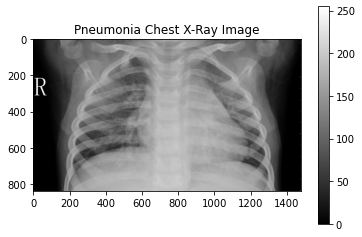

In [72]:
# Investigate a single x-ray 
sample_xray = plt.imread(os.path.join(train_pneumo_dir,random_xray[1]))
plt.imshow(sample_xray, cmap ="gray")
plt.colorbar()
plt.title("Pneumonia Chest X-Ray Image")
print("The dimensions of the image are {0} pixels width and {1} pixels height, one single color channel."\
      .format(sample_xray.shape[0],sample_xray.shape[1]))
print("The maximum pixel value is {0} and the minimum is {1}"\
     .format(sample_xray.max(),sample_xray.min()))
print("The mean value of the pixels is {0:.1f} and the standard deviation is {1:.1f}"\
     .format(sample_xray.mean(),sample_xray.std()))

 * Intensity range is [0,255]

Text(0, 0.5, 'Count of Pixels in Image')

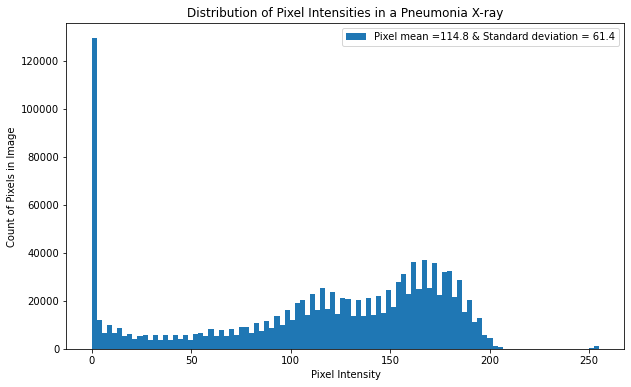

In [95]:
# Investigate pixel distribution 
fig, ax = plt.subplots(figsize = (10,6))
plt.hist(sample_xray.ravel(), bins = 100, label = "Pixel mean =114.8 & Standard deviation = 61.4")
plt.legend(loc = 'upper right')
plt.title('Distribution of Pixel Intensities in a Pneumonia X-ray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count of Pixels in Image')